In [ ]:
import pandas as pd
import sklearn as sk 
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import json
import ast
%matplotlib inline  

co_df = pd.read_csv('./temp/co_ob_eth_krw.csv')
kb_df = pd.read_csv('./temp/kb_ob_eth_krw.csv')
co_df.head()

,timestamp,result,errorCode,bid,ask,maxBid,minAsk,requestTime
0,1520523759,success,0,"[{'price': '839800', 'qty': '3.7318'}, {'price...","[{'price': '842200', 'qty': '0.7432'}, {'price...","{'price': '839800', 'qty': '3.7318'}","{'price': '842200', 'qty': '0.7432'}",1520523758
1,1520523765,success,0,"[{'price': '839800', 'qty': '3.7318'}, {'price...","[{'price': '842200', 'qty': '0.7432'}, {'price...","{'price': '839800', 'qty': '3.7318'}","{'price': '842200', 'qty': '0.7432'}",1520523764
2,1520523771,success,0,"[{'price': '839800', 'qty': '3.7318'}, {'price...","[{'price': '842100', 'qty': '0.0118'}, {'price...","{'price': '839800', 'qty': '3.7318'}","{'price': '842100', 'qty': '0.0118'}",1520523770
3,1520523777,success,0,"[{'price': '839800', 'qty': '3.7318'}, {'price...","[{'price': '842000', 'qty': '0.7432'}, {'price...","{'price': '839800', 'qty': '3.7318'}","{'price': '842000', 'qty': '0.7432'}",1520523776
4,1520523783,success,0,"[{'price': '839800', 'qty': '2.7327'}, {'price...","[{'price': '842000', 'qty': '0.7432'}, {'price...","{'price': '839800', 'qty': '2.7327'}","{'price': '842000', 'qty': '0.7432'}",1520523782


In [2]:
co_minAsk = list(map(ast.literal_eval, co_df['minAsk'].values.tolist()))
co_maxBid = list(map(ast.literal_eval, co_df['maxBid'].values.tolist()))
co_minAsk = np.array([[price_or_qty for price_or_qty in co_minAsk_dict.values()] for co_minAsk_dict in co_minAsk], dtype=np.float)
co_maxBid = np.array([[price_or_qty for price_or_qty in co_maxBid_dict.values()] for co_maxBid_dict in co_maxBid], dtype=np.float)
co_minmax_df = DataFrame(data=np.hstack([co_minAsk, co_maxBid]), columns=["minAsk_price", "minAsk_qty", "maxBid_price", "maxBid_qty"])

kb_minAsk = list(map(ast.literal_eval, kb_df['minAsk'].values.tolist()))
kb_maxBid = list(map(ast.literal_eval, kb_df['maxBid'].values.tolist()))
kb_minmax_df = DataFrame(data=np.hstack([np.array(kb_minAsk, dtype=np.float)[:, :2], np.array(kb_maxBid, dtype=np.float)[:, :2]]), columns=["minAsk_price", "minAsk_qty", "maxBid_price", "maxBid_qty"])

In [3]:
co_minmax_df.head(5)

,minAsk_price,minAsk_qty,maxBid_price,maxBid_qty
0,842200.0,0.7432,839800.0,3.7318
1,842200.0,0.7432,839800.0,3.7318
2,842100.0,0.0118,839800.0,3.7318
3,842000.0,0.7432,839800.0,3.7318
4,842000.0,0.7432,839800.0,2.7327


In [4]:
kb_minmax_df.head(5)

,minAsk_price,minAsk_qty,maxBid_price,maxBid_qty
0,843350.0,15.0409,837700.0,27.1000
1,843300.0,0.0278,837750.0,8.3100
2,843350.0,15.0409,837850.0,6.9550
3,843250.0,0.3833,837150.0,8.3000
4,843300.0,0.4111,838000.0,4.4088


In [5]:
# kb에서 매수하고 co에서 매도
kb_fee = 0.0008
co_fee = 0.001
ktoc_spread = (1 - kb_fee) * kb_minmax_df['minAsk_price'] - (1 + co_fee) * co_minmax_df['maxBid_price']
ktoc_spread.to_csv('./spread.csv')

In [6]:
[(i,v) for i, v in enumerate(ktoc_spread.values[:3000])]

[(0, 2035.5200000000186),
 (1, 1985.5600000000559),
 (2, 2035.5200000000186),
 (3, 1935.6000000000931),
 (4, 1985.5600000000559),
 (5, 1985.5600000000559),
 (6, 1985.5600000000559),
 (7, 1985.5600000000559),
 (8, 1985.5600000000559),
 (9, 1985.5600000000559),
 (10, 1985.5600000000559),
 (11, 1985.5600000000559),
 (12, 1935.6000000000931),
 (13, 1835.6800000000512),
 (14, 2035.5200000000186),
 (15, 1985.5600000000559),
 (16, 1835.6800000000512),
 (17, 2035.5200000000186),
 (18, 1935.6000000000931),
 (19, 1935.6000000000931),
 (20, 1885.640000000014),
 (21, 1985.5600000000559),
 (22, 2035.5200000000186),
 (23, 1985.5600000000559),
 (24, 2085.6600000000326),
 (25, 2035.7000000000698),
 (26, 2035.5200000000186),
 (27, 2085.6600000000326),
 (28, 2035.5200000000186),
 (29, 1985.5600000000559),
 (30, 2035.7000000000698),
 (31, 1785.9000000000233),
 (32, 1635.8400000000838),
 (33, 1635.8400000000838),
 (34, 1585.8800000000047),
 (35, 1535.920000000042),
 (36, 1485.9600000000792),
 (37, 1336.08

In [7]:
ktoc_spread.describe()

count     4975.000000
mean      3079.413475
std       3552.753178
min      -3621.680000
25%        565.780000
50%       1885.640000
75%       4894.120000
max      15942.300000
dtype: float64

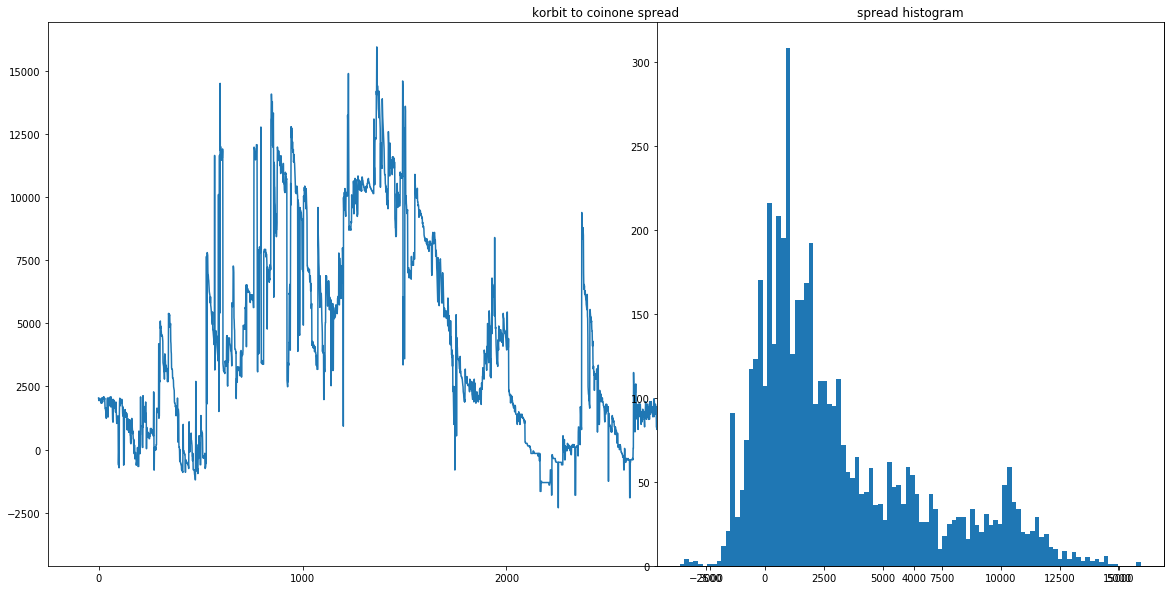

In [8]:
fig = plt.figure()
fig.set_size_inches(20, 10)
ax_1 = fig.add_subplot(1,1,1)
ax_1.plot(ktoc_spread)
ax_2 = fig.add_subplot(1,2,2)
# ax_2.hist(ktoc_spread, bins=range(int(min(ktoc_spread)), int(max(ktoc_spread)) + 100, 100))
ax_2.hist(ktoc_spread, bins= 100)
ax_1.set_title("korbit to coinone spread", color='black')
ax_2.set_title("spread histogram")
# fig.savefig('./test.png')
plt.show()

In [9]:
sampling_data = ktoc_spread[(ktoc_spread > 0) & (ktoc_spread < 7000)].tail(1000)
mu = sampling_data.mean()
sigma = sampling_data.std()
new = mu - sigma
reverse = mu + sigma

new, reverse

#     def get_spreads(self, long_market_name, short_market_name, value_count=20):
#         long_market = self.markets[long_market_name]
#         short_market = self.markets[short_market_name]
#         long_hoga = open("./testdata/%s-hoga.json" % long_market_name, 'r')
#         short_hoga = open("./testdata/%s-hoga.json" % short_market_name, 'r')
#         long_hoga = list(map(lambda x: json.loads(x), long_hoga.read().split()))
#         short_hoga = list(map(lambda x: json.loads(x), short_hoga.read().split()))
        
#         long_hoga = np.array([hoga["maxBid_price"] for hoga in long_hoga])
#         short_hoga = np.array([hoga["minAsk_price"] for hoga in short_hoga])
#         return -(long_hoga[-value_count:]) * (1 + long_market.fee) \
#                  + (short_hoga[-value_count:] * (1 - short_market.fee))


(698.8422644656948, 4106.417935534455)

In [11]:
import numpy as np
import logging
import os
import glob
import re 
import urllib.request
import urllib.error
import urllib.parse

class Market(object):
    def __init__(self, name, fee=0, krw_balance=3000., eth_balance=10., persistent=False):
        self.name = name
        self.filename = "./testdata/%s-balance.json" % name
        self.krw_balance = krw_balance
        self.eth_balance = eth_balance
        self.fee = fee
        self.persistent = persistent
        if self.persistent:
            try:
                self.load()
            except IOError:
                pass

    def buy(self, volume, bid_price):
#         print("execute buy %f ETH @ %f on %s" % (volume, bid_price, self.name))
        self.eth_balance += volume - volume * self.fee
        self.krw_balance -= bid_price * volume
        if self.persistent:
            self.save()
        
    def sell(self, volume, ask_price):
#         print("execute sell %f ETH @ %f on %s" % (volume, ask_price, self.name))
        self.eth_balance -= volume
        self.krw_balance += ask_price * volume - ask_price * volume * self.fee
        if self.persistent:
            self.save()

    def load(self):
        # db select
        data = json.load(open(self.filename, "r"))
        self.krw_balance = data["krw"]
        self.btc_balance = data["eth"]

    def save(self):
        # db insert
        data = {'krw': self.krw_balance, 'eth': self.eth_balance}
        json.dump(data, open(self.filename, "w"))

    def balance_total(self, price):
        return self.krw_balance + self.eth_balance * price

In [12]:
from market import Market
import numpy as np 
import json
import urllib.request
import time
import logging

class ArbitrageBot():
    def __init__(self):
        self.korbit = Market("korbit", fee=0.0008, krw_balance=1000000, eth_balance=10)
        self.coinone = Market("coinone", fee=0.001, krw_balance=1000000, eth_balance=10)
        self.new_spread_stack = np.array([], dtype=np.float32)
        self.reverse_spread_stack = np.array([], dtype=np.float32)
        self.bolinger_spread_stack = np.array([], dtype=np.float32)
        
        self.markets = {
            "korbit": self.korbit,
            "coinone": self.coinone
        }

    def test(self):
        count = 0
        while(count < 100):
            self.execute("coinone", "korbit", 20)
            count += 1

    def execute(self, a_market_name, b_market_name, timestep):
        a_market = self.markets[a_market_name]
        b_market = self.markets[b_market_name]
        
        while (self.new_spread_stack.size < timestep):
            new_spread, reverse_spread, _, _ = self.get_current_spread(a_market_name, b_market_name)
            self.new_spread_stack = np.append(self.new_spread_stack, new_spread)
            self.reverse_spread_stack = np.append(self.reverse_spread_stack, reverse_spread)
            print("loading.. until %s is %s" % (self.new_spread_stack.size, timestep))
            if (self.new_spread_stack.size == timestep):
                print("loading finished\n")
                
#         print("now new stack %s" % self.new_spread_stack)
#         print("now reverse stack %s" % self.reverse_spread_stack)
        
        new_mov_avg = self.new_spread_stack.mean()
        new_sigma = self.new_spread_stack.std()
        
        reverse_mov_avg = self.reverse_spread_stack.mean()
        reverse_sigma = self.reverse_spread_stack.std()
        
        current_new_spread, current_reverse_spread, hoga_a, hoga_b = self.get_current_spread(a_market_name, b_market_name)
        print("new_mov_avg: %s, new_sigma: %s and current_new: %s" %(new_mov_avg, new_sigma, current_new_spread))
        print("reverse_mov_avg: %s, reverse_sigma: %s and current_reverse: %s" \
              %(reverse_mov_avg, reverse_sigma, current_reverse_spread))
        
        if (current_new_spread >= new_mov_avg + new_sigma and current_new_spread > 0):
            print("[new]")
            a_market.buy(volume=0.03, bid_price=hoga_a["maxbid"])
            b_market.sell(volume=0.03, ask_price=hoga_b["minask"])
        elif (current_reverse_spread >= reverse_mov_avg + reverse_sigma and current_reverse_spread > 0):
            print("[reverse]")
            b_market.buy(volume=0.03, bid_price=hoga_b["maxbid"])
            a_market.sell(volume=0.03, ask_price=hoga_a["minask"])
        else:
            print("[No]")
            
#         total_krw = a_market.balance_total(hoga_a["maxbid"]) + b_market.balance_total(hoga_b["maxbid"])
        print("[Total krw: %s\n" % (self.total_krw_balance()))
        
        self.new_spread_stack = np.delete(self.new_spread_stack, 0)
        self.reverse_spread_stack = np.delete(self.reverse_spread_stack, 0)
        self.new_spread_stack = np.append(self.new_spread_stack, current_new_spread)
        self.reverse_spread_stack = np.append(self.reverse_spread_stack, current_reverse_spread)
            
    def total_krw_balance(self):
        return sum([i.krw_balance for i in self.markets.values()])
    
    def total_eth_balance(self):
        return sum([i.eth_balance for i in self.markets.values()])
        
    def get_current_spread(self, a_market_name, b_market_name):
        time.sleep(3)
        a_market = self.markets[a_market_name]
        b_market = self.markets[b_market_name]
        a_hoga = self.get_market_hoga(a_market_name)
        b_hoga = self.get_market_hoga(b_market_name)
        print("[%s] maxbid: %s, minask: %s" % (a_market_name, a_hoga["maxbid"], a_hoga["minask"]))
        print("[%s] maxbid: %s, minask: %s" % (b_market_name, b_hoga["maxbid"], b_hoga["minask"]))
        new_spread = self.get_spread(a_hoga["maxbid"], a_market.fee, b_hoga["minask"], b_market.fee)
        reverse_spread = self.get_spread(b_hoga["maxbid"], b_market.fee, a_hoga["minask"], a_market.fee)
        return new_spread, reverse_spread, a_hoga, b_hoga
    
    def get_spread(self, maxbid, maxbid_fee, minask, minask_fee): 
        return -maxbid * (1 + maxbid_fee) + minask * (1 - minask_fee)
    
    def get_market_hoga(self, market_name, currency="eth_krw"):
        hoga = None
        if market_name == "korbit":
            depth = self.get_depth_api("https://api.korbit.co.kr/v1/orderbook?currency_pair=%s" % currency)
            depth_asks = depth["asks"]
            depth_bids = depth["bids"]
            hoga = { "minask": np.array(depth_asks)[:,0].astype(int).min(),\
                    "maxbid": np.array(depth_bids)[:,0].astype(int).max() }
            
        if market_name == "coinone":
            currency = "eth"
            depth = self.get_depth_api("https://api.coinone.co.kr/orderbook?currency=%s" % currency)
            hoga = { "minask": np.array([ask["price"] for ask in depth["ask"]]).astype(int).min(), \
                    "maxbid": np.array([bid["price"] for bid in depth["bid"]]).astype(int).max() }
        return hoga
    
    def get_depth_api(self, url):
        req = urllib.request.Request(url, None, headers={
            "Content-Type": "application/x-www-form-urlencoded",
            "Accept": "*/*",
            "User-Agent": "curl"})
        res = urllib.request.urlopen(req)
        if (res == None):
            return None
        depth = json.loads(res.read().decode('utf8'))
        return depth

In [13]:
t = ArbitrageBot()
t.test()

[coinone] maxbid: 563900, minask: 564000
[korbit] maxbid: 562000, minask: 566400
loading.. until 1 is 20
[coinone] maxbid: 563900, minask: 564000
[korbit] maxbid: 562000, minask: 566350
loading.. until 2 is 20
[coinone] maxbid: 563900, minask: 564000
[korbit] maxbid: 562350, minask: 566300
loading.. until 3 is 20
[coinone] maxbid: 563900, minask: 564000
[korbit] maxbid: 562150, minask: 566250
loading.. until 4 is 20
[coinone] maxbid: 563900, minask: 564000
[korbit] maxbid: 562150, minask: 566350
loading.. until 5 is 20
[coinone] maxbid: 562600, minask: 563900
[korbit] maxbid: 562100, minask: 566300
loading.. until 6 is 20
[coinone] maxbid: 562600, minask: 563900
[korbit] maxbid: 562000, minask: 566300
loading.. until 7 is 20
[coinone] maxbid: 562600, minask: 563900
[korbit] maxbid: 562200, minask: 566250
loading.. until 8 is 20
[coinone] maxbid: 562600, minask: 563900
[korbit] maxbid: 562200, minask: 566150
loading.. until 9 is 20
[coinone] maxbid: 562600, minask: 563900
[korbit] maxbi

[coinone] maxbid: 564100, minask: 565000
[korbit] maxbid: 563600, minask: 565900
new_mov_avg: 1514.0090000000723, new_sigma: 464.9657629750794 and current_new: 783.1800000000512
reverse_mov_avg: -272.18699999997045, reverse_sigma: 290.6076964758479 and current_reverse: 384.11999999999534
[reverse]
execute buy 0.030000 ETH @ 563600.000000 on korbit
execute sell 0.030000 ETH @ 565000.000000 on coinone
[Total krw: 2000078.1500000001

[coinone] maxbid: 564000, minask: 565000
[korbit] maxbid: 564350, minask: 565900
new_mov_avg: 1453.949000000069, new_sigma: 477.7332567646893 and current_new: 883.2800000001444
reverse_mov_avg: -247.25699999997158, reverse_sigma: 322.68358708027984 and current_reverse: -366.4799999999814
[No]
[Total krw: 2000078.1500000001

[coinone] maxbid: 564000, minask: 565000
[korbit] maxbid: 564350, minask: 565900
new_mov_avg: 1398.89400000007, new_sigma: 476.8787211482492 and current_new: 883.2800000001444
reverse_mov_avg: -254.86199999997044, reverse_sigma: 323.610139

[coinone] maxbid: 564700, minask: 565000
[korbit] maxbid: 564500, minask: 565950
new_mov_avg: 750.6250000001048, new_sigma: 263.1010497793786 and current_new: 232.54000000003725
reverse_mov_avg: -78.65999999995692, reverse_sigma: 697.9747504315606 and current_reverse: -516.5999999999767
[No]
[Total krw: 2000193.3500000003

[coinone] maxbid: 564600, minask: 565000
[korbit] maxbid: 564500, minask: 565950
new_mov_avg: 698.0680000001041, new_sigma: 256.26772300860944 and current_new: 332.64000000001397
reverse_mov_avg: -78.74999999995926, reverse_sigma: 698.0310962557479 and current_reverse: -516.5999999999767
[No]
[Total krw: 2000193.3500000003

[coinone] maxbid: 564600, minask: 565000
[korbit] maxbid: 564250, minask: 565950
new_mov_avg: 673.0340000001015, new_sigma: 266.0989866271968 and current_new: 332.64000000001397
reverse_mov_avg: -138.79799999996322, reverse_sigma: 681.2565130374877 and current_reverse: -266.39999999990687
[No]
[Total krw: 2000193.3500000003

[coinone] maxbid: 5648

[coinone] maxbid: 568000, minask: 568500
[korbit] maxbid: 565250, minask: 569950
new_mov_avg: -32.46799999993527, new_sigma: 822.0549463484926 and current_new: 926.0400000001537
reverse_mov_avg: 863.1360000000801, reverse_sigma: 1118.4939535750589 and current_reverse: 2229.3000000000466
[new]
execute buy 0.030000 ETH @ 568000.000000 on coinone
execute sell 0.030000 ETH @ 569950.000000 on korbit
[Total krw: 2000830.6202000007

[coinone] maxbid: 567600, minask: 568500
[korbit] maxbid: 565100, minask: 570000
new_mov_avg: -2.797999999928288, new_sigma: 845.0832578131183 and current_new: 1376.4000000000233
reverse_mov_avg: 987.9210000000778, reverse_sigma: 1124.7155431214435 and current_reverse: 2379.420000000042
[new]
execute buy 0.030000 ETH @ 567600.000000 on coinone
execute sell 0.030000 ETH @ 570000.000000 on korbit
[Total krw: 2000888.9402000005

[coinone] maxbid: 568600, minask: 569800
[korbit] maxbid: 565400, minask: 570000
new_mov_avg: 59.40000000006985, new_sigma: 896.934786793347

[coinone] maxbid: 566900, minask: 569100
[korbit] maxbid: 567200, minask: 569400
new_mov_avg: 1442.06800000004, new_sigma: 799.1960477229545 and current_new: 1477.5800000000745
reverse_mov_avg: 940.3290000000386, reverse_sigma: 724.0076489229856 and current_reverse: 877.1400000001304
[No]
[Total krw: 2001641.4518000004

[coinone] maxbid: 566800, minask: 568300
[korbit] maxbid: 566700, minask: 569350
new_mov_avg: 1497.1770000000427, new_sigma: 760.8228077620893 and current_new: 1527.7200000000885
reverse_mov_avg: 815.2920000000449, reverse_sigma: 460.0757795581054 and current_reverse: 578.3399999999674
[No]
[Total krw: 2001641.4518000004

[coinone] maxbid: 566800, minask: 568300
[korbit] maxbid: 567000, minask: 569400
new_mov_avg: 1554.7930000000458, new_sigma: 716.0022368756864 and current_new: 1577.6800000000512
reverse_mov_avg: 790.3800000000396, reverse_sigma: 458.74051135690985 and current_reverse: 278.0999999999767
[No]
[Total krw: 2001641.4518000004

[coinone] maxbid: 566900, min